# Visualizing Networks

In [19]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt

import pandas as pd

# read in the graph 
G = nx.read_gpickle('major_us_cities')

In [15]:
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

In [20]:
G_df = pd.read_csv('email_network.txt', sep='\t', 
                   header=0, names=['sender', 'recipient', 'time'])
G_df

,sender,recipient,time
0,1,2,1262454010
1,1,3,1262454010
2,1,4,1262454010
3,1,5,1262454010
4,1,6,1262454010
...,...,...,...
82922,3,39,1285868337
82923,3,39,1285868352
82924,19,18,1285877937
82925,85,3,1285884469


In [22]:
G5 = nx.from_pandas_edgelist(G_df, 'sender', 'recipient', edge_attr='time')
#G5.edges(data=True)

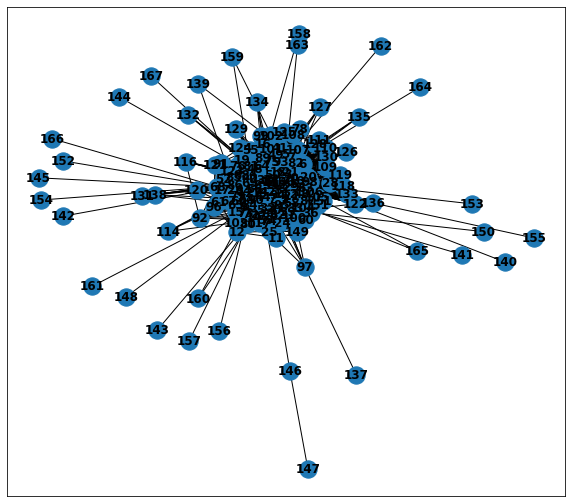

In [23]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G5, with_labels=True, font_weight='bold')

In [ ]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(G, with_labels=True, font_weight='bold')

In [24]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout']

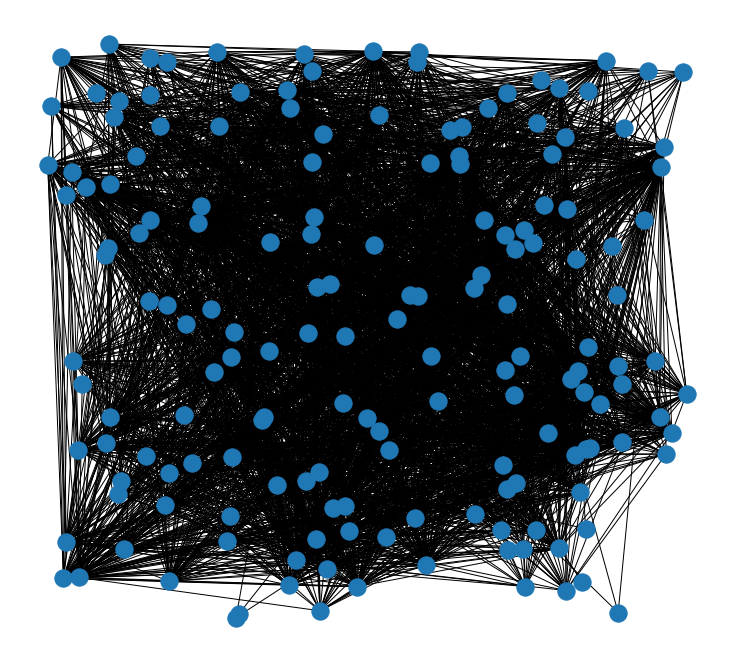

In [26]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G5)
nx.draw(G5, pos)

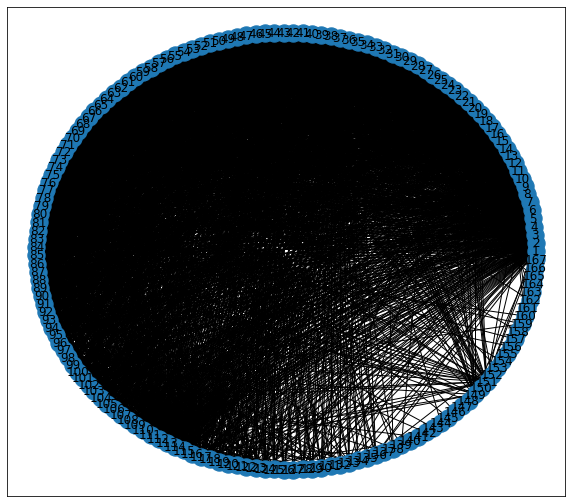

In [27]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G5)
nx.draw_networkx(G5, pos)

NetworkXError: Node 1 has no position.

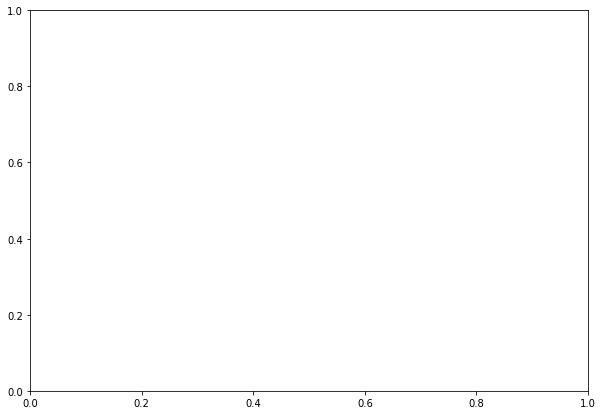

In [28]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G5, 'time')
nx.draw_networkx(G5, pos)

In [ ]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

In [ ]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

In [ ]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();